# **Regression Models (Simple Linear-Multiple)**

# Simple Linear Regression

**Carbon Dioxide Emissions**:

Using Simple Regression Model to predict the co2 emission of a car based on its engine size for trial 1 and fuel consumption for trail 2 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-27 23:44:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   339KB/s    in 0.2s    

2022-02-27 23:44:25 (339 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [6]:
import warnings # to remove all future warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

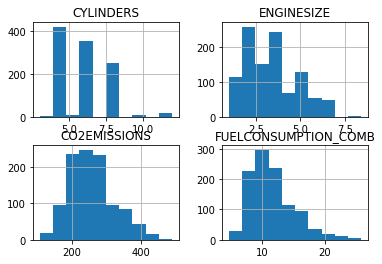

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

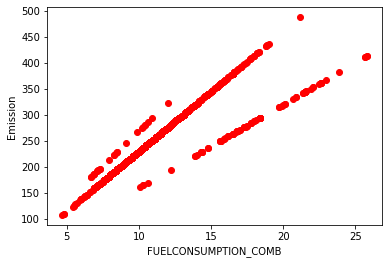

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [9]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


# Simple Linear Regression Trail 1
where dependant Variable is CO2EMISSIONS and Independant Variable is ENGINESIZE.

In [10]:
#splitting the data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

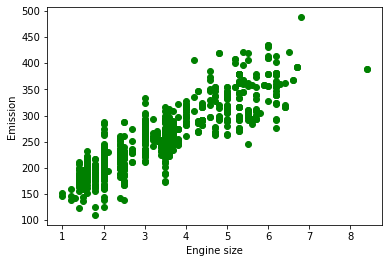

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.63904209]]
Intercept:  [126.45586319]


Text(0, 0.5, 'Emission')

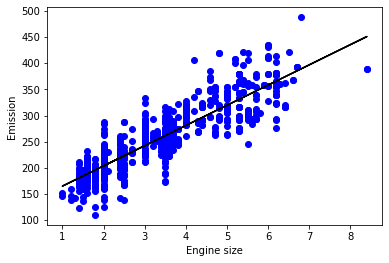

In [13]:
#i dont know why we need to use [0]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'black')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pre_y = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pre_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pre_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pre_y) )

Mean absolute error: 25.28
Residual sum of squares (MSE): 1117.40
R2-score: 0.74


# Simple Linear Regression Trail 2
where dependant Variable is CO2EMISSIONS and Independant Variable is FuelConsumption.

In [15]:
train_x_2 = train[['FUELCONSUMPTION_COMB']]

test_x_2 = test[['FUELCONSUMPTION_COMB']]

In [16]:
regr = linear_model.LinearRegression()
regr.fit(train_x_2, train_y)
pre_y_2 =regr.predict(test_x_2)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[16.0354872]]
Intercept:  [70.16515211]


In [17]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(pre_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pre_y_2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pre_y_2) )

Mean absolute error: 25.28
Residual sum of squares (MSE): 676.09
R2-score: 0.84


# **-----------------------------------------**

# **Multiple Regression Model:**

Calculating CO2EMISSIONS based on multiple variables.

In [18]:
mlr = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mlr.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


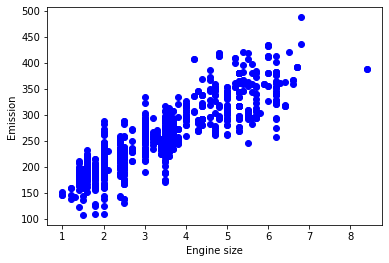

In [19]:
plt.scatter(mlr.ENGINESIZE, mlr.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
mlr_train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
mlr_train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (mlr_train_x, mlr_train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[12.41737448  7.02455956  9.0208243 ]]


In [21]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
mlr_test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
mlr_test_y = np.asanyarray(test[['CO2EMISSIONS']])


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - mlr_test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - mlr_test_y) ** 2))
print("R2-score: %.2f" % r2_score(mlr_test_y , y_hat) )

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(mlr_test_x, mlr_test_y))

Mean absolute error: 17.10
Residual sum of squares (MSE): 550.23
R2-score: 0.87
Variance score: 0.87
